# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

### Imported Libraries

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed
%matplotlib qt
print ("Libraries Imported!")

Libraries Imported!


# Camera Calibration

Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.



## A. Functions

In [2]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        offset = 150 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    else:
        print ("No Corners were found!")
        M = []
        warped = []
    # Return the resulting image and matrix
    return warped, M

## B. Main Code

### 1. Computing Camera Calibration using Chessboard Images (Finding Corners)

Invalid ret: ../camera_cal\calibration1.jpg
Invalid ret: ../camera_cal\calibration4.jpg
Invalid ret: ../camera_cal\calibration5.jpg
Done!


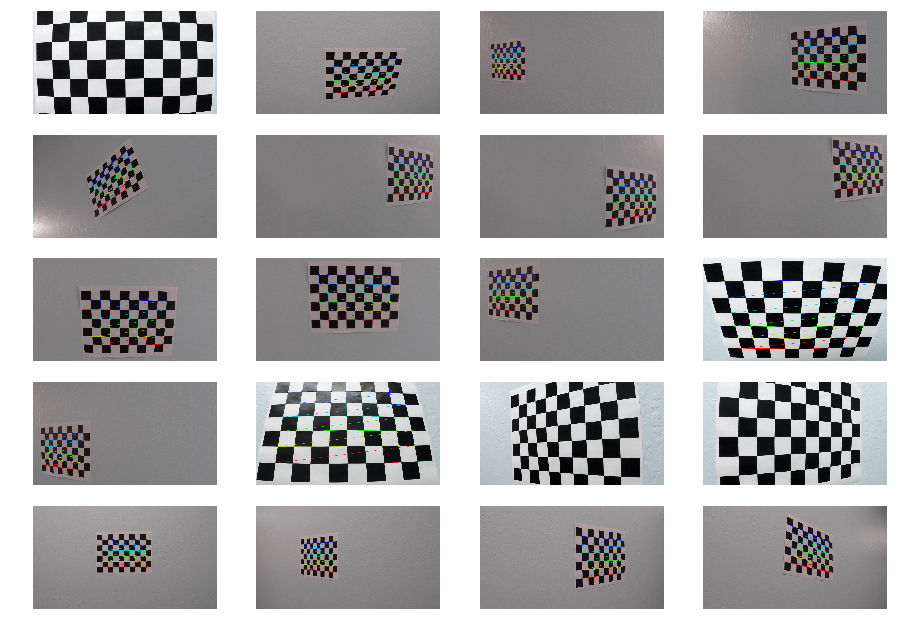

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')
fimages = []
fimgs = []
fimgschess = []

nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
    imgchess = img.copy()
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        fimages.append(fname)
        fimgs.append(img)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(imgchess, (nx,ny), corners, ret)
        fimgschess.append(imgchess)
        cv2.waitKey(500)
    else:
        print ("Invalid ret: "+str(fname))
    axs[idx].axis('off')
    axs[idx].imshow(imgchess)
    
cv2.destroyAllWindows()

ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print ("Done!")

Note: The Corners in Images 1,4 and 5 were not fully detected by the findChessboardCorners function, thats why the original image was displayed instead

---

### 2. Undistortion & Perspective Transformation : Chessboard Example

In [ ]:
f, axs = plt.subplots(9,4, figsize=(60, 60)) #16, 11
f.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, img in enumerate(fimgs):
    # plt.imshow(img)
    # plt.show()
    top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
    
    if len(top_down)==0:
        print ("Image "+str(i)+" : Cannot Unwarp!")
    else:
        #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        axs[i*2].imshow(img)
        axs[i*2].set_title('Original Image', fontsize=40)
        axs[(i*2)+1].imshow(top_down)
        axs[(i*2)+1].set_title('Undistorted & Warped', fontsize=40)
        #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Project Pipelines

## 1. Example of Distorted Road Image

The following parameters will be used generally from our Camera Calibration step to undistort and unwrap the Road Images
...........
...........

In [4]:
# undistort image using the camera calibration matrix calculated above
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
print('Done!')

Done!


In [ ]:
# Choose an image from which to build and demonstrate each step of the pipeline
testImg = cv2.imread('../test_images/straight_lines1.jpg')
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
# plt.imshow(testImg)

testImg_undistort = undistort(testImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(testImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(testImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
print('Visualize Undistortion:')

## 2. Perspective Transformation of an Undistorted Road Image

In [5]:
def img_unwarp(img, src, dst):
    height,width = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (width,height), flags=cv2.INTER_LINEAR)
    return warped, M, Minv
print('Done')

Done


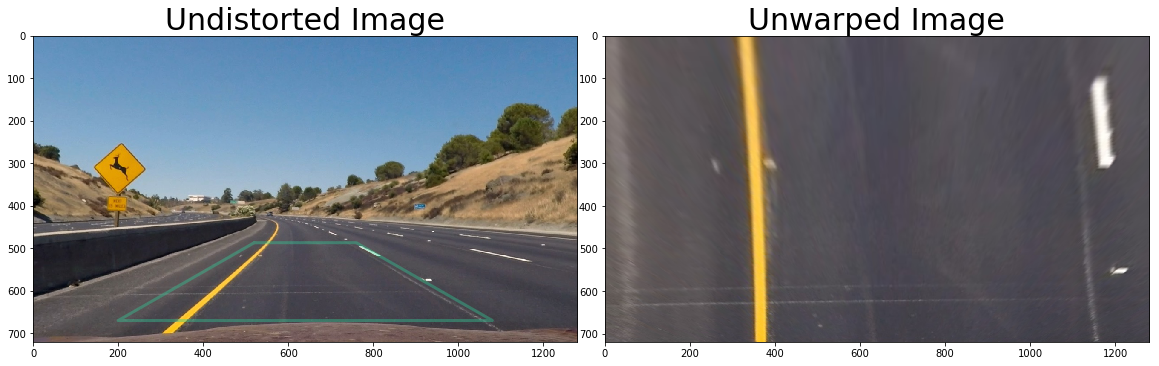

In [13]:
# This time we are defining a four sided polygon to mask
img_height, img_width = testImg_undistort.shape[:2]
    
# define source and destination points for transform

# # define source and destination points for transform
src = np.float32([  ((img_width/2)-(img_width/16)-40, (6 * img_height / 10)+55),
                    ((img_width/2)+(img_width/16)+40, (6 * img_height / 10)+55),
                    (200, img_height-50),
                    (img_width-200, img_height-50)])

# src = np.float32([  (200, 0), #(6 * img_height / 9)-80),
#                     (img_width-200, 0), #(6 * img_height / 9)-80),
#                     (200, img_height),
#                     (img_width-200, img_height)])

# src = np.float32([(575,464),
#                   (707,464), 
#                   (258,682), 
#                   (1049,682)])

dst = np.float32([(200, 0),
                  (img_width-100, 0),
                  (200, img_height),
                  (img_width-100, img_height)])

testImg_unwarp, M, Minv = img_unwarp(testImg_undistort, src, dst)

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(testImg_undistort)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
ax1.set_ylim([img_height,0])
ax1.set_xlim([0,img_width])
ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(testImg_unwarp)
ax2.set_title('Unwarped Image', fontsize=30)


## 3. Gradient Threshold - Sobel Operator 

### A. Sobel Absolute Threshold

In [ ]:
# Absolute Sobel Threshold function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    #print (scaled_sobel)

    # Return the result
    return binary_output

# Run the function
grad_X = abs_sobel_thresh(testImg_unwarp, orient='x', thresh_min=20, thresh_max=100)
grad_Y = abs_sobel_thresh(testImg_unwarp, orient='y', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testImg_unwarp)
ax1.set_title('Original Image', fontsize=30)

ax2.imshow(grad_X, cmap='gray')
ax2.set_title('Sobel Gradient X', fontsize=30)

ax3.imshow(grad_Y, cmap='gray')
ax3.set_title('Sobel Gradient Y', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### B. Sobel Magnitude Threshold

In [ ]:
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output
# Run the function
mag_binary = mag_thresh(testImg_unwarp, sobel_kernel=3, mag_thresh=(20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Sobel Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
print ("Done")

### C. Sobel Direction Threshold

In [ ]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=7, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    #binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    binary_output[(absgraddir < thresh[0]) | (absgraddir > thresh[1])] = 1
#     print (absgraddir)
    # Return the binary image
    return binary_output


# # Run the function
dir_binary = dir_threshold(testImg_unwarp, sobel_kernel=7, thresh=(0.4, 1.5)) # thresh=(0.7, 1.3)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Sobel Direction', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### D. Sobel Combined Threshold

In [ ]:
# Apply each of the thresholding functions
# gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
# grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
# mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
# dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))


combined = np.zeros_like(grad_Y)
combined[((grad_X == 1) & (grad_Y == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# combined[((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Sobel Combined Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## 4. Color Transforms

### A. RGB Transforms

In [7]:
image = testImg_unwarp

print ('Original Image:')
plt.imshow(image)
plt.show()

# Gray Scale Binary
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

thresh = (200, 255)

# RED Channel Binary
R_binary = np.zeros_like(R)
R_binary[(R > thresh[0]) & (R <= thresh[1])] = 1

# GREEN Channel Binary
G_binary = np.zeros_like(G)
G_binary[(G > thresh[0]) & (G <= thresh[1])] = 1

# BLUE Channel Binary
B_binary = np.zeros_like(B)
B_binary[(B > thresh[0]) & (B <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(binary)
ax1.set_title('Grayscale Binary', fontsize=30)

ax2.imshow(R_binary, cmap='gray')
ax2.set_title('RED Binary (R)', fontsize=30)

ax3.imshow(G_binary, cmap='gray')
ax3.set_title('GREEN Binary (G)', fontsize=30)

ax4.imshow(B_binary, cmap='gray')
ax4.set_title('BLUE Binary (B)', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

NameError: name 'testImg_unwarp' is not defined

The R-Binary Image seems to identify the lanes and show them very clear more than the other color channels.

### B. HLS Transforms

In [ ]:
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))

image = testImg_unwarp

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

thresh = (10, 40)
H_binary = np.zeros_like(H)
H_binary[(H > thresh[0]) & (H <= thresh[1])] = 1

thresh = (200, 255)
L_binary = np.zeros_like(L)
L_binary[(L > thresh[0]) & (L <= thresh[1])] = 1

thresh = (150, 255)
S_binary = np.zeros_like(S)
S_binary[(S > thresh[0]) & (S <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(hls)
ax1.set_title('HLS Image', fontsize=30)

ax2.imshow(H_binary, cmap='gray')
ax2.set_title('H Binary', fontsize=30)

ax3.imshow(L_binary, cmap='gray')
ax3.set_title('L Binary', fontsize=30)

ax4.imshow(S_binary, cmap='gray')
ax4.set_title('S Binary', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


The Hue with threshold (10, 40) will detect the yellow colored lanes and the Luminance with threshold (200, 255) will detect the high Luminance values which will more likely all the White colors.

In [8]:
# This Masking function in the HLS domain was applied in the previous project (Project1: Finding Lane Lines)
# and it could perfectly show the yellow and white lanes 
def select_white_yellow(image):
    """Image transformation from RGB to HLS,
    then the White & Yellow colors are detected & combined together"""
    # convert to HLS
    converted = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    # white color mask
    lower = np.uint8([  0, 200,   0])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted, lower, upper)
    # yellow color mask
    lower = np.uint8([ 10,   0, 100])
    upper = np.uint8([ 40, 255, 255])
    yellow_mask = cv2.inRange(converted, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    return cv2.bitwise_and(image, image, mask = mask)

In [6]:
# Make the Bitwise combination of only White & Yellow Colors
white_yellow_img = select_white_yellow(image)
WY_bin = np.zeros_like(white_yellow_img)
WY_bin[(white_yellow_img > 0)] = 255

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(white_yellow_img)
ax1.set_title('White-Yellow HLS Masked Image', fontsize=30)

ax2.imshow(WY_bin, cmap='gray')
ax2.set_title('White-Yellow HLS Masked BINARY Image', fontsize=30)

NameError: name 'image' is not defined

## 5. Histogram Peaks

In [ ]:
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram


# WY_bin is represented in 0-255, so normalize back to 0-1
binary_warped = WY_bin/255

# Create histogram of image binary activations
histogram = hist(binary_warped)

# Visualize the resulting histogram
plt.plot(histogram)

## 6. Sliding Window & Polynomial Fitting

In [ ]:

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    plt.plot(histogram)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
#     leftx_base = np.argmax(histogram[:midpoint])
#     rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print ('binary_warped.shape = '+str(binary_warped.shape))
    print ('midpoint = '+str(midpoint))
    print ('leftx_base = '+str(leftx_base))
    print ('rightx_base = '+str(rightx_base))
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 10 #9
    # Set the width of the windows +/- margin
    margin = 80 #100
    # Set minimum number of pixels found to recenter window
    minpix = 40 #50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    print (nonzeroy)
    print (nonzerox)
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base
    print ('leftx_current = '+str(leftx_current))
    print ('rightx_current = '+str(rightx_current))

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
#     # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        print (win_y_low)
        print (win_y_high)
        print (win_xleft_low)
        print (win_xleft_high)
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
#         rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        print (good_left_inds)
        print (good_right_inds)
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
#     print (len(leftx))
#     print (len(lefty))
#     print (len(rightx))
#     print (len(righty))
#     plt.imshow(out_img)
#     plt.show()
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img



out_img = fit_polynomial(binary_warped)

# plt.imshow(out_img)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(binary_warped)
ax1.set_title('White-Yellow HLS Masked Binary Image', fontsize=30)

ax2.imshow(out_img, cmap='gray')
ax2.set_title('Resulted Sliding Window', fontsize=30)

## 6. Image Processing Pipeline on Original Images

In [14]:
# Define the complete image processing pipeline, reads raw image and returns binary image with lane lines identified
# (hopefully)
def pipeline(img):
    
    plt.imshow(img)
    plt.show()
    # Undistort
    Timg_undistort = undistort(img)
    
    plt.imshow(Timg_undistort)
    plt.show()
    # Perspective Transform
    Timg_unwarp, M, Minv = img_unwarp(Timg_undistort, src, dst)
    
    plt.imshow(Timg_unwarp)
    plt.show()

    # Sobel Absolute (using default parameters)
    #img_sobelAbs = abs_sobel_thresh(img_unwarp)

    # Sobel Magnitude (using default parameters)
    #img_sobelMag = mag_thresh(img_unwarp)
    
    # Sobel Direction (using default parameters)
    #img_sobelDir = dir_thresh(img_unwarp)
    
    # HLS S-channel Threshold (using default parameters)
    #img_SThresh = hls_sthresh(img_unwarp)

    # HLS L-channel Threshold (using default parameters)
#     img_LThresh = hls_lthresh(Timg_unwarp)

#     # Lab B-channel Threshold (using default parameters)
#     img_BThresh = lab_bthresh(Timg_unwarp)
    
#     # Combine HLS and Lab B channel thresholds
#     combined = np.zeros_like(img_BThresh)
#     combined[(img_LThresh == 1) | (img_BThresh == 1)] = 1
    
    # Make the Bitwise combination of only White & Yellow Colors
    white_yellow_img = select_white_yellow(Timg_unwarp)
    WY_bin = np.zeros_like(white_yellow_img)
    WY_bin[(white_yellow_img > 0)] = 255
    combined = WY_bin/255
    
        # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(white_yellow_img)
    ax1.set_title('White-Yellow HLS Masked Image', fontsize=30)

    ax2.imshow(combined, cmap='gray')
    ax2.set_title('White-Yellow HLS Masked BINARY Image', fontsize=30)
    
    return combined, Minv
    
print('...')

...


In [15]:
# Define method to fit polynomial to binary image with lines extracted, using sliding window
def sliding_window_polyfit(img):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
    #print('base pts:', leftx_base, rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data
print('...')

...


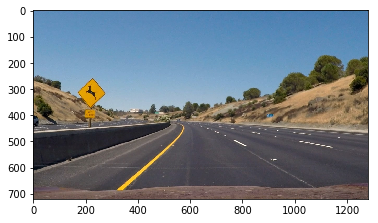

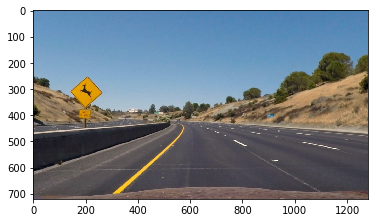

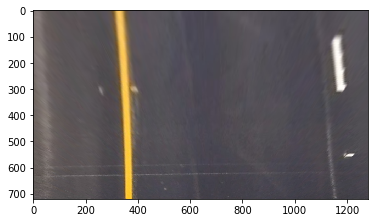

left_fit = [ -6.37055111e-05   9.88922633e-02   3.26869878e+02]
right_fit = None
left_lane_inds = [90957 90958 90959 ...,  9420  9421  9422]
right_lane_inds = []


TypeError: 'NoneType' object is not subscriptable

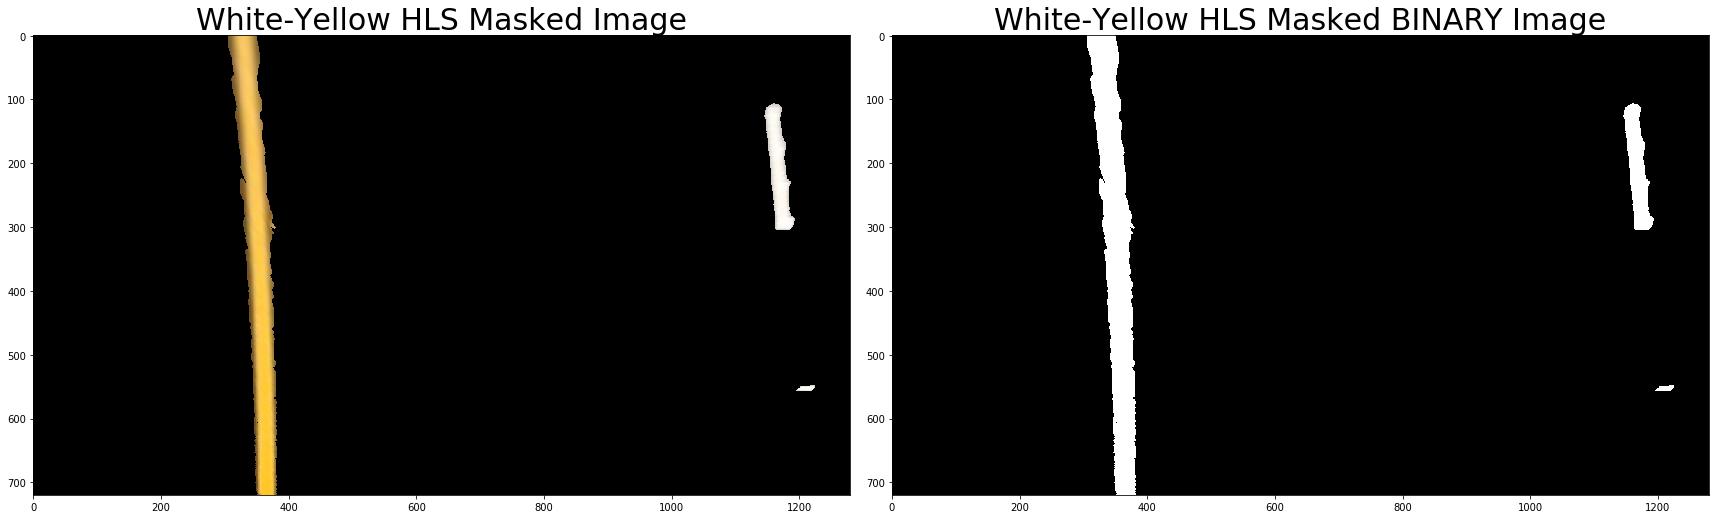

In [16]:
# visualize the result on example image
exampleImg = cv2.imread('../test_images/test2.jpg')
# exampleImg = testImg_undistort
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
exampleImg_bin, Minv = pipeline(exampleImg)

#exampleImg_bin = binary_warped

left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_polyfit(exampleImg_bin)

print ('left_fit = '+str(left_fit))
print ('right_fit = '+str(right_fit))
print ('left_lane_inds = '+str(left_lane_inds))
print ('right_lane_inds = '+str(right_lane_inds))


h = exampleImg.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg_bin.shape[0]-1, exampleImg_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = exampleImg_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

print('...')

Visualize Undistortion:


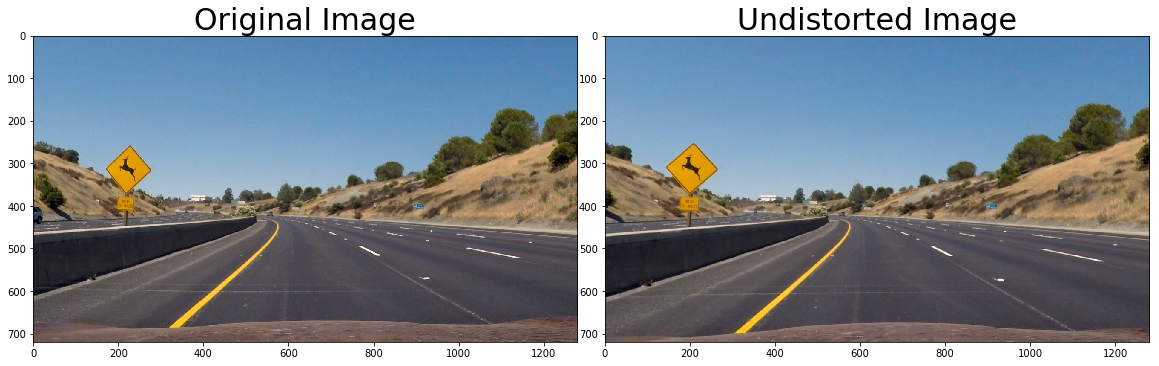

In [11]:
# Choose an image from which to build and demonstrate each step of the pipeline
testImg = cv2.imread('../test_images/test2.jpg')
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
# plt.imshow(testImg)

testImg_undistort = undistort(testImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(testImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(testImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
print('Visualize Undistortion:')

In [ ]:
plt.imshow(testImg_undistort)
plt.show()

## 6. Image Processing Pipeline on Original Images

In [ ]:
# Define the complete image processing pipeline, reads raw image and returns binary image with lane lines identified
# (hopefully)
def pipeline(img):
    
    plt.imshow(img)
    plt.show()
    # Undistort
    Timg_undistort = undistort(img)
    
    plt.imshow(Timg_undistort)
    plt.show()
    # Perspective Transform
    Timg_unwarp, M, Minv = img_unwarp(Timg_undistort, src, dst)
    
    plt.imshow(Timg_unwarp)
    plt.show()

    # Sobel Absolute (using default parameters)
    #img_sobelAbs = abs_sobel_thresh(img_unwarp)

    # Sobel Magnitude (using default parameters)
    #img_sobelMag = mag_thresh(img_unwarp)
    
    # Sobel Direction (using default parameters)
    #img_sobelDir = dir_thresh(img_unwarp)
    
    # HLS S-channel Threshold (using default parameters)
    #img_SThresh = hls_sthresh(img_unwarp)

    # HLS L-channel Threshold (using default parameters)
#     img_LThresh = hls_lthresh(Timg_unwarp)

#     # Lab B-channel Threshold (using default parameters)
#     img_BThresh = lab_bthresh(Timg_unwarp)
    
#     # Combine HLS and Lab B channel thresholds
#     combined = np.zeros_like(img_BThresh)
#     combined[(img_LThresh == 1) | (img_BThresh == 1)] = 1
    
    # Make the Bitwise combination of only White & Yellow Colors
    white_yellow_img = select_white_yellow(Timg_unwarp)
    WY_bin = np.zeros_like(white_yellow_img)
    WY_bin[(white_yellow_img > 190) & (white_yellow_img <= 255)] = 1
    combined = WY_bin
    
#     WY_bin[(white_yellow_img > 0)] = 255
#     combined = WY_bin/255
        # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(white_yellow_img)
    ax1.set_title('White-Yellow HLS Masked Image', fontsize=30)

    ax2.imshow(combined, cmap='gray')
    ax2.set_title('White-Yellow HLS Masked BINARY Image', fontsize=30)
    
    return combined, Minv
    
print('...')

In [ ]:
# Define method to fit polynomial to binary image with lines extracted, using sliding window
def sliding_window_polyfit(img):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
    #print('base pts:', leftx_base, rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data
print('...')

In [ ]:
# visualize the result on example image
exampleImg = cv2.imread('./test_images/test2.jpg')
# exampleImg = testImg_undistort
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
exampleImg_bin, Minv = pipeline(exampleImg)

#exampleImg_bin = binary_warped

left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_polyfit(exampleImg_bin)

print ('left_fit = '+str(left_fit))
print ('right_fit = '+str(right_fit))
print ('left_lane_inds = '+str(left_lane_inds))
print ('right_lane_inds = '+str(right_lane_inds))


h = exampleImg.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg_bin.shape[0]-1, exampleImg_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = exampleImg_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

print('...')

In [ ]:
# Choose an image from which to build and demonstrate each step of the pipeline
testImg = cv2.imread('./test_images/test2.jpg')
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
# plt.imshow(testImg)

testImg_undistort = undistort(testImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(testImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(testImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
print('Visualize Undistortion:')

In [ ]:
# Define method to fit polynomial to binary image based upon a previous fit (chronologically speaking);
# this assumes that the fit will not change significantly from one video frame to the next
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds
print('...')

In [ ]:
# visualize the result on example image
exampleImg2 = cv2.imread('../test_images/test5.jpg')
exampleImg2 = cv2.cvtColor(exampleImg2, cv2.COLOR_BGR2RGB)
exampleImg2_bin, Minv = pipeline(exampleImg2)   
margin = 80

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = polyfit_using_prev_fit(exampleImg2_bin, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg2_bin.shape[0]-1, exampleImg2_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

# Create an image to draw on and an image to show the selection window
out_img = np.uint8(np.dstack((exampleImg2_bin, exampleImg2_bin, exampleImg2_bin))*255)
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
nonzero = exampleImg2_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area (OLD FIT)
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
print('...')